#### ***Parametric monitoring of motor usage for PdM per recipe:*** A machine learning model applying a trend regression analysis on "n" exponential moving averages (EMA) to predict the health of a motor. 

***Flowchart of the algorithm***

![Flowchart](img/Torque_Flow_Diagram.png)

***Creating "healthy" pseudo Shred_Torque_Fbk_Raw observations (n = 1000)***

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

with open("data/obs.csv", "w+"):
    np.random.seed(0)
    df = pd.DataFrame(np.random.randint(290, 310, 1000), columns=['Torque'])
    df.to_csv('data/obs.csv')  

***Plotting the data***

<AxesSubplot:xlabel='index', ylabel='Torque'>

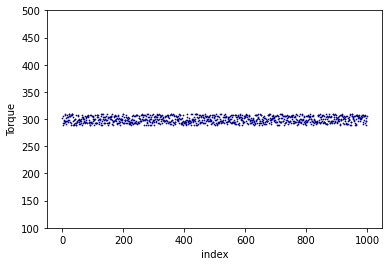

In [142]:
df = pd.read_csv('data/obs.csv')
df.reset_index().plot(kind='scatter', s=0.5, x='index', y='Torque', c='DarkBlue', ylim=(100, 500))

***Applying EMA and showing the result***

In [132]:
df = pd.read_csv('data/obs.csv')
ewm = df['Torque'].ewm(span=4, adjust=False).mean()
#Interested only in the last smoothed result i.e today's EMA
print("Today's EMA is: {}".format(ewm[len(df)-1]))

Today's EMA is: 301.1169433699982


***Generating n=30 "healthy" pseudo EMAs***

In [240]:
ewm_list = []
for x in range(30):
    df = pd.DataFrame(np.random.randint(290, 310, 1000), columns=['Torque'])
    ewm = df['Torque'].ewm(span=4, adjust=False).mean()
    ewm_today = ewm[len(df)-1]
    ewm_list.append(ewm_today)
dfe = pd.DataFrame(ewm_list, columns=['EWM'])
with open("data/ema.csv", "w+"):
    dfe.to_csv('data/ema.csv')

***Plotting the data and showing trend***

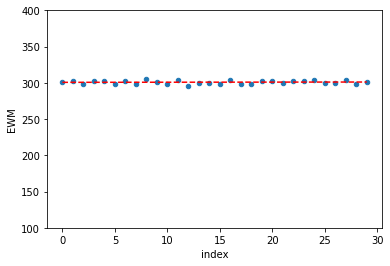

y=0.014749x+(300.696731)


In [241]:
df = pd.read_csv('data/ema.csv')
df.reset_index().plot.scatter(x='index', y='EWM', ylim=(100, 400))
#show trend 
y = df["EWM"]
x = df.index
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()
print("y=%.6fx+(%.6f)"%(z[0],z[1]))


***Adding "unhealthy" pseudo Shred_Torque_Fbk_Raw observations***

In [242]:
#quick and dirty using n=100 for EWM 
y_list =[]
ewm_list = []
i = 310
for x in range(30):
    i+=1
    y1_list = []
    for x1 in range(100):
        if x1 == 0:
            continue
        y = np.log2(x1)+(np.random.randint(i, i + 10)) 
        y1_list.append(y)
    df = pd.DataFrame(y1_list, columns=['Torque'])
    ewm = df['Torque'].ewm(span=4, adjust=False).mean()
    ewm_today = ewm[len(df)-1]
    ewm_list.append(ewm_today)

df_ema_old = pd.read_csv('data/ema.csv')
df_ema_new = pd.DataFrame(ewm_list, columns=['EWM'])
df_ema_concat = pd.concat([df_ema_old, df_ema_new], axis=0, ignore_index=True)
with open("data/ema.csv", "w+"):
    df_ema_concat.to_csv('data/ema.csv')


***Plotting the data and showing trend***

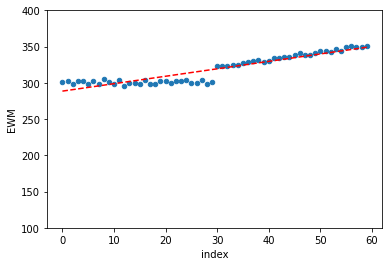

y=1.025850x+(288.579310)


In [243]:
df = pd.read_csv('data/ema.csv')
df.reset_index().plot.scatter(x='index', y='EWM', ylim=(100, 400))
#show trend 
y = df["EWM"]
x = df.index
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

### Slope is greater than 1.0 send alert.